First few rows of the dataset:
   Hours_Studied  Attendance  Final_Score
0            5.0          90           85
1            3.0          60           55
2            6.0          95           90
3            2.0          40           42
4            7.0          98           92

Missing values in each column:
Hours_Studied    0
Attendance       0
Final_Score      0
dtype: int64

Pairplot showing relationships between variables:


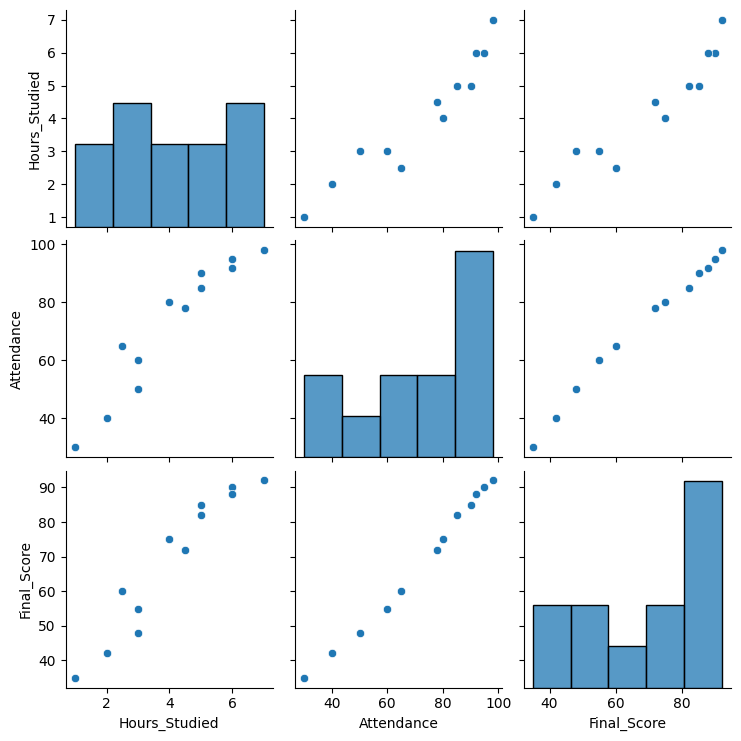


Model Evaluation Metrics:
R² Score: 0.9980089427424917
Mean Absolute Error: 1.0018825275981154

Predicted Final Score for 4 hours studied and 80% attendance: 74.66


In [9]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# STEP 2: Load dataset
df = pd.read_csv('student_scores.csv')
print("First few rows of the dataset:")
print(df.head())

# STEP 3: Clean the data (Check and handle missing values)
print("\nMissing values in each column:")
print(df.isnull().sum())

# Remove any rows with missing values (optional: df.fillna() could be used instead)
df.dropna(inplace=True)

# STEP 4: Visualize relationships
print("\nPairplot showing relationships between variables:")
sns.pairplot(df)
plt.show()

# STEP 5: Split data for training and testing
X = df[['Hours_Studied', 'Attendance']]
y = df['Final_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# STEP 6: Train the model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 7: Predict and evaluate the model
y_pred = model.predict(X_test)

# Display evaluation metrics
print("\nModel Evaluation Metrics:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# STEP 8: Predict for new input values
# Example input: 4 hours studied, 80% attendance
new_data = pd.DataFrame([[4, 80]], columns=['Hours_Studied', 'Attendance'])
predicted_score = model.predict(new_data)
print(f"\nPredicted Final Score for 4 hours studied and 80% attendance: {predicted_score[0]:.2f}")


In [11]:
print("Intercept:", model.intercept_)
print("Coefficient (Hours_Studied):", model.coef_[0])
print("Coefficient (Attendance):", model.coef_[1])


Intercept: 7.56698428352923
Coefficient (Hours_Studied): 1.4183574837064081
Coefficient (Attendance): 0.7690575572375843
